# Getting at Data

Both SunPy and Astropy have utilities for downloading data for your delectation. They are simple and easy to use, however increasing levels of computing will allow a great deal of personalisation and selection. Let us begin with SunPy

## Aquiring Data with SunPy

### Fido

The Federated Internet Data Obtainer (Fido) is the SunPy interface for downloading data from a wide variety of sources.

So what do we need?

In [7]:
import astropy.units as u
from sunpy.net import Fido, attrs as a

This is your client object. This is effectively the intermediary between yourself and the treasure chest of solar data available. You query VSO, then VSO querys all data providers which fit the limiations you imposed during your search command. The VSO client also handles the particulars of dowloading the data onto your machiene. 

## Making a query

Lets kick off with an example, lets ask the veteran of solar imaging, SoHO for some EIS data, between the dates of between January 1st and 2nd, 2001,

In [8]:
qr = Fido.search(a.Time('2001/1/1','2001/1/2'),a.Instrument('eit'))

`qr` is the results of our search, it holds all the records that have been returned from all the services that matched the query.

In [9]:
qr

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str4,str3,str8,float64
2001-01-01 00:00:42,2001-01-01 00:00:54,SOHO,EIT,FULLDISK,195.0 .. 195.0
2001-01-01 00:12:10,2001-01-01 00:12:23,SOHO,EIT,FULLDISK,195.0 .. 195.0
2001-01-01 00:24:10,2001-01-01 00:24:22,SOHO,EIT,FULLDISK,195.0 .. 195.0
2001-01-01 00:36:10,2001-01-01 00:36:22,SOHO,EIT,FULLDISK,195.0 .. 195.0
2001-01-01 00:48:10,2001-01-01 00:48:22,SOHO,EIT,FULLDISK,195.0 .. 195.0
2001-01-01 01:00:14,2001-01-01 01:00:21,SOHO,EIT,FULLDISK,171.0 .. 171.0
2001-01-01 01:06:03,2001-01-01 01:08:05,SOHO,EIT,FULLDISK,284.0 .. 284.0
2001-01-01 01:13:45,2001-01-01 01:13:57,SOHO,EIT,FULLDISK,195.0 .. 195.0


### Break it down

So we can pass many attributes to the VSO, in this case we started with time

`a.Time('2001/1/1','2001/1/2')`

Start and end times for the query as strings, any date/time function can be understood by SunPy's parse_time function e.g. the datetime onjects we will look at later. Next we give it the instrument we want:

`a.Instrument('eit')`

You don't have to pass it an instrument, the client will find all available missions in the parameter you've defined if you like. Next, wavelength:

`a.Wave(14.2*u.nm, 12.3*u.nm)`

We pass it a min and max wavelength. This has to be an astropy units quantity (in SI for the love of coffee). If you don't you will get an error.
 
For a full list of attributes that vso can take use:

In [11]:
a.

SyntaxError: invalid syntax (<ipython-input-11-b4ce96ddcee0>, line 1)

## More Complex Searching

In this example we will use the logical operators to combine attributes into a complex multi-instrument query.

You can use the & and operator or the `|` or operator to make queries. In the previous example all arguments to `Fido.search` had the and operator applied, we performed a search where the Instrument and the Wavelength and the time matched. We could have done this explicitly like this:

In [12]:
mysearch = a.Time('2016/02/03','2016/02/03 00:10:00')&a.Instrument('AIA')
Fido.search(mysearch)

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2016-02-03 00:00:00,2016-02-03 00:00:01,SDO,AIA,FULLDISK,94.0 .. 94.0
2016-02-03 00:00:01,2016-02-03 00:00:02,SDO,AIA,FULLDISK,335.0 .. 335.0
2016-02-03 00:00:05,2016-02-03 00:00:06,SDO,AIA,FULLDISK,193.0 .. 193.0
2016-02-03 00:00:06,2016-02-03 00:00:07,SDO,AIA,FULLDISK,304.0 .. 304.0
2016-02-03 00:00:06,2016-02-03 00:00:07,SDO,AIA,FULLDISK,4500.0 .. 4500.0
2016-02-03 00:00:07,2016-02-03 00:00:08,SDO,AIA,FULLDISK,131.0 .. 131.0
2016-02-03 00:00:10,2016-02-03 00:00:11,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-02-03 00:00:10,2016-02-03 00:00:11,SDO,AIA,FULLDISK,211.0 .. 211.0


If we want to do the same query but for two seperate wavelengths we can use the `|` or operator:

In [13]:
instrument = a.Time('2016/02/03','2016/02/03 00:10:00')& a.Instrument('AIA')
wavelength = a.Wavelength(17.1*u.nm,17.1*u.nm)|a.Wavelength(304*u.AA)
mysearch= instrument &wavelength

Fido.search(mysearch)

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2016-02-03 00:00:10,2016-02-03 00:00:11,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-02-03 00:00:22,2016-02-03 00:00:23,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-02-03 00:00:34,2016-02-03 00:00:35,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-02-03 00:00:46,2016-02-03 00:00:47,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-02-03 00:00:58,2016-02-03 00:00:59,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-02-03 00:01:10,2016-02-03 00:01:11,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-02-03 00:01:22,2016-02-03 00:01:23,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-02-03 00:01:34,2016-02-03 00:01:35,SDO,AIA,FULLDISK,171.0 .. 171.0


### Multiple Instruments

In this example we want to download one image from STEREO A EUVI and one image from SDO AIA as close together in time as we can. To do this we will define a search for the AIA image and a search for the EUVI image then 'or' them together.

In [15]:
stereo = (a.vso.Source('STEREO_B')&a.Instrument('EUVI')&a.Time('2011-01-01','2011-01-01 00:10:00'))

aia=(a.Instrument('AIA')& a.Sample(24*u.hour)&a.Time('2011-01-01','2011-01-02'))

wave= a.Wavelength(30*u.nm, 31*u.nm)

In [16]:
results = Fido.search(stereo |aia,wave)
results

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str8,str6,str8,float64
2011-01-01 00:07:01,2011-01-01 00:07:05,STEREO_B,SECCHI,FULLDISK,304.0 .. 304.0
Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2011-01-01 00:00:08,2011-01-01 00:00:09,SDO,AIA,FULLDISK,304.0 .. 304.0


In [17]:
files = Fido.fetch(results,path='~/sunpy/{instrument}/{file}')
files

[                                        ========================================
[                                        ========================================


['/Users/dannyhorta/sunpy/SECCHI/20110101_000615_n4eub.fts',
 '/Users/dannyhorta/sunpy/AIA/aia_lev1_304a_2011_01_01t00_00_08_12z_image_lev1.fits']

## HEK

The Heliophysics Event Knowledgebase (HEK) is a repository of feature and event information about the Sun. Entries are generated both by automated algorithms and human observers.

We need to set up HEK:

In [18]:
from sunpy.net import hek
hek_client = hek.HEKClient()

Creating a very similar client as we saw with VSO above.

Given that HEK is a database of solar events of interest, the query has different requirements to VSO. It needs start and end times, and an event type. Again time objects can be defined as datetime objects or correctly formatted strings.

Event types are specified as uppercase two letter strings found on [the HEK website](http://www.lmsal.com/hek/VOEvent_Spec.html)

In [20]:
tstart = '2011/08/09 07:23:56'
tend = '2011/08/09 12:40:29'
event_type = "FL"

result= hek_client.search(hek.attrs.Time(tstart,tend),hek.attrs.EventType(event_type))

Notice that the HEK query is extremely similar to the VSO query style, with our attributes defined accordingly.

Instead of returning a list, HEK returns a list of dictionary objects. Each entry in the dictionary sis a pair of key-value pairs that exactly correspond to the parameters. We can return the key words using:

In [22]:
result[0].keys()

dict_keys(['gs_thumburl', 'comment_count', 'hpc_bbox', 'frm_humanflag', 'hgc_coord', 'event_coordsys', 'obs_levelnum', 'hpc_coord', 'event_npixels', 'gs_imageurl', 'ar_polarity', 'frm_paramset', 'hrc_coord', 'event_starttime', 'ar_mtwilsoncls', 'event_type', 'intensmin', 'fl_fluence', 'obs_meanwavel', 'frm_url', 'skel_chaincode', 'bound_chaincode', 'noposition', 'fl_fluenceunit', 'active', 'intensmax', 'frm_versionnumber', 'fl_peaktempunit', 'fl_halphaclass', 'area_uncert', 'obs_dataprepurl', 'hpc_geom', 'hgc_bbox', 'intensmedian', 'chaincodetype', 'obs_channelid', 'event_clippedspatial', 'ar_noaaclass', 'SOL_standard', 'event_avg_rating', 'eventtype', 'intensunit', 'hpc_boundcc', 'event_mapurl', 'frm_contact', 'ar_penumbracls', 'intensmean', 'bound_ccstartc1', 'frm_name', 'area_atdiskcenter', 'frm_identifier', 'obs_observatory', 'event_description', 'boundbox_c2ur', 'obs_firstprocessingdate', 'boundbox_c2ll', 'frm_institute', 'hrc_bbox', 'refs_orig', 'ar_mcintoshcls', 'event_maskurl',

Remember, the HEK query we made returns all the flares in the time-range stored in the HEK, regardless of the feature recognition method. The HEK parameter which stores the the feature recognition method is called “frm_name”. Using list comprehensions (which are very cool), it is easy to get a list of the feature recognition methods used to find each of the flares in the result object, for example:

In [24]:
for elem in result:
    print(elem['frm_name'])
    print(elem['fl_peakflux'])



asainz
None
asainz
None
asainz
None
asainz
None
asainz
None
asainz
None
asainz
None
SSW Latest Events
None
SWPC
None
Flare Detective - Trigger Module
2326.86
Flare Detective - Trigger Module
1698.83
SSW Latest Events
None
SWPC
None
Flare Detective - Trigger Module
2360.49
Flare Detective - Trigger Module
3242.64
Flare Detective - Trigger Module
1375.93
Flare Detective - Trigger Module
6275.98
Flare Detective - Trigger Module
923.984
Flare Detective - Trigger Module
1019.83


This way we can avoid troublesome doubling up of results. We can do the same `help(hek.attrs)` command as VSO to fins out further options. 

## Aquiring data with AstroQuery

Astroquery supports a plethora of [services](https://astroquery.readthedocs.org/en/latest/#using-astroquery), all of which follow roughly the same API (application program interface). In its simplest for the API involves queries based on coordinates or object names e.g. using SIMBAD:

In [3]:
import astroquery
from astroquery.simbad import Simbad
result = Simbad.query_object('m31')

In [4]:
result

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object
M 31,00 42 44.330,+41 16 07.50,7,7,--,--,0,B,I,2006AJ....131.1163S


In this case the query is looking at a specific set of coordinates

In [10]:
from astropy.coordinates import SkyCoord
coord= SkyCoord('05h35m17.3s -05d23m28s')

In [11]:
import astropy.units as u
radius = 5*u.arcminute

In [12]:
result=Simbad.query_region(coord,radius=radius)

In [13]:
result

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object
NAME Ori Region,05 35 17.30,-05 23 28.0,6,6,--,--,0,D,O,
M 42,05 35 17.3,-05 23 28,5,5,7500.000,7500.000,90,D,,1981MNRAS.194..693L
[OW94] 172-237,05 35 17.20,-05 23 26.8,6,6,--,--,0,D,,1999AJ....117.1375S
[OW94] 172-327,05 35 17.20,-05 23 26.8,6,6,--,--,0,D,,1996AJ....111..846O
DOH 7 175-328,05 35 17.5,-05 23 28,5,5,--,--,0,D,,2004AJ....127.3456D
MAX 126,05 35 17.11,-05 23 29.3,6,6,--,--,0,D,I,2005AJ....129.1534R
DOH 7 171-327,05 35 17.1,-05 23 27,5,5,--,--,0,D,,2004AJ....127.3456D
MAX 125,05 35 17.11,-05 23 26.6,6,6,--,--,0,D,I,2005AJ....129.1534R


These methods can be expanded to all the following modules


*    SIMBAD Queries (astroquery.simbad)
*    IRSA Dust Extinction Service Queries (astroquery.irsa_dust)
*    NED Queries (astroquery.ned)
*    Splatalogue Queries (astroquery.splatalogue)
*    IRSA Image Server program interface (IBE) Queries (astroquery.ibe)
*    IRSA Queries (astroquery.irsa)
*    UKIDSS Queries (astroquery.ukidss)
*    MAGPIS Queries (astroquery.magpis)
*    NRAO Queries (astroquery.nrao)
*    Besancon Queries (astroquery.besancon)
*    NIST Queries (astroquery.nist)
*    NVAS Queries (astroquery.nvas)
*    GAMA Queries (astroquery.gama)
*    ESO Queries (astroquery.eso)
*    Atomic Line List (astroquery.atomic)
*    ALMA Queries (astroquery.alma)
*    Skyview Queries (astroquery.skyview)
*    NASA ADS Queries (astroquery.nasa_ads)
*    HEASARC Queries (astroquery.heasarc)



# Combining Queries and Plotting

Using astroquery and wcsaxes together we can download both an image and a star field and over plot them. To download an image we can use the Simbad service:

In [14]:
from astroquery.skyview import SkyView

In [15]:
m42_images=SkyView.get_images(position='M42',survey=['2MASS-K'],pixels=2000)

In [26]:
hdu=m42_images[0][0] #.header

<section class="objectives panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Plot this image using WCSAxes </h2>
</div>
<ul>
<li>
Create a WCS object.
</li>
<li>
Create a figure with the projection set to the WCS object
</li>
<li>
Plot the image.
</li>
</ul>
</section>

In [31]:
from astropy.wcs import WCS

wcs= WCS(hdu.header)


<IPython.core.display.Javascript object>


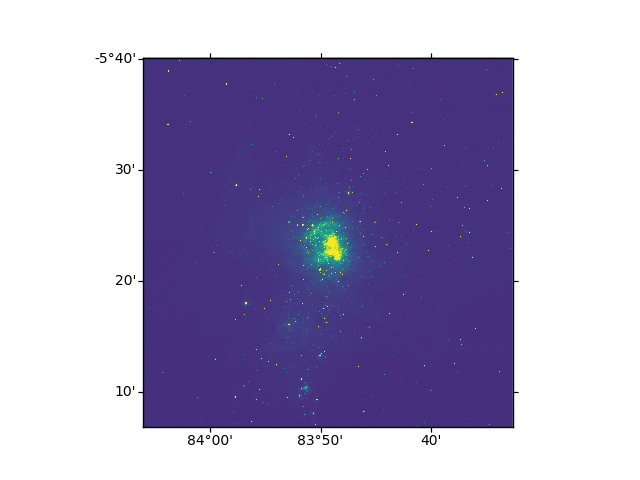

In [34]:
%matplotlib notebook
import matplotlib.pyplot as plt

ax = plt.subplot(projection=wcs)
ax.imshow(hdu.data,vmax=1000)

Download some catalog data: